In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Just to push


3.282758620689655
1.7355072463768115


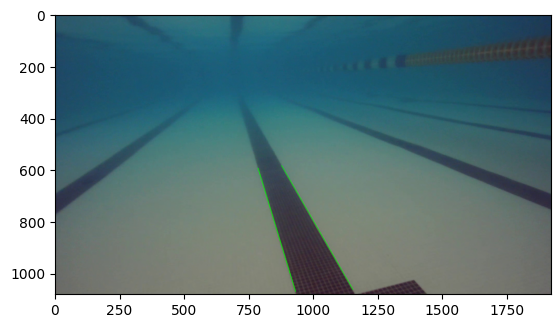

In [2]:
img = cv2.imread('rov_pool.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 106, 107, apertureSize=3) # detect edges, gray is image in grayscale, 50 and 150 represent 2 images that have been threshholded at 2 different levels, apertureSize controls how much light the image gets and how exposed it is
lines = cv2.HoughLinesP(
                edges, #described above
                1, #1 pixel resolution parameter
                np.pi/180, # 1 degree resolution parameter
                60, #min number of intersections/votes
                minLineLength=475,
                maxLineGap=100,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    slope = (y2-y1)/(x2-x1)
    print(str(slope))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
def drawLines(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 90, 100, apertureSize=3) 
    lines = cv2.HoughLinesP(
                    edges, #described above
                    1, #1 pixel resolution parameter
                    np.pi/180, # 1 degree resolution parameter
                    10, #min number of intersections/votes
                    minLineLength=10,
                    maxLineGap=60,
            ) # detect lines
    try:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            slope = (y2-y1)/(x2-x1)
            print(str(slope))
    except TypeError:
        pass
    
    return img


In [4]:
import cv2
import numpy as np

video = cv2.VideoCapture('AUV_Vid.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

ret, frame = video.read()
count = 0
frequency = 1

while ret:
    if count % frequency == 0:
        processed_frame = drawLines(frame)
        output_video.write(processed_frame)

    count += 1
    ret, frame = video.read()

video.release()
output_video.release()

0.423963133640553
0.4233128834355828
1.9603174603174602
0.421259842519685
1.9666666666666666
4.8125
0.36
1.96875
4.416666666666667
1.9609375
0.4246575342465753
0.3333333333333333
0.35294117647058826
0.4219269102990033
1.9649122807017543
0.42441860465116277
1.9509803921568627
1.9646017699115044
0.36470588235294116
4.25
0.3829787234042553
0.4444444444444444
0.34615384615384615
5.0625
0.4444444444444444
0.3695652173913043
0.42592592592592593
1.9696969696969697
0.42316258351893093
1.9649122807017543
1.971698113207547
0.4234527687296417
0.36401673640167365
1.9610389610389611
0.421875
4.8
0.3626373626373626
1.9649122807017543
4.166666666666667
1.9639639639639639
0.4224137931034483
1.9519230769230769
0.3656957928802589
0.4198895027624309
1.9642857142857142
1.9651162790697674
0.43478260869565216
4.2
0.4051724137931034
4.416666666666667
1.9672131147540983
0.4066666666666667
1.9540229885057472
0.40875912408759124
0.34615384615384615
1.9534883720930232
1.9639639639639639
0.358974358974359
0.36470

/tmp/ipykernel_1063/4163481249.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)


2.3516483516483517
2.358974358974359
6.2631578947368425
6.176470588235294
2.343283582089552
2.378787878787879
2.34375
6.352941176470588
2.260869565217391
2.257425742574257
2.2421052631578946
6.346153846153846
2.2545454545454544
2.2555555555555555
6.411764705882353
8.0
2.357142857142857
2.36
2.3417721518987342
6.407407407407407
6.269230769230769
2.3544303797468356
6.3125
2.36
2.263157894736842
8.133333333333333
2.276595744680851
2.2653061224489797
2.235294117647059
6.666666666666667
7.222222222222222
7.75
2.2758620689655173
2.2526315789473683
2.3488372093023258
2.3620689655172415
7.95
2.3626373626373627
8.166666666666666
7.208333333333333
7.909090909090909
2.2551020408163267
8.105263157894736
2.257142857142857
10.125
2.255813953488372
8.5
2.269230769230769
2.6470588235294117
2.260869565217391
8.133333333333333
8.333333333333334
2.360544217687075
2.3564356435643563
2.3524590163934427
2.346774193548387
7.1891891891891895
7.25
7.32
7.148148148148148
2.3515625
2.357142857142857
8.2083333333

TypeError: 'NoneType' object is not iterable

0.423963133640553
0.4233128834355828
1.9603174603174602
0.421259842519685
1.9666666666666666
4.8125
0.36
1.96875
4.416666666666667
1.9609375
0.4246575342465753
0.3333333333333333
0.35294117647058826


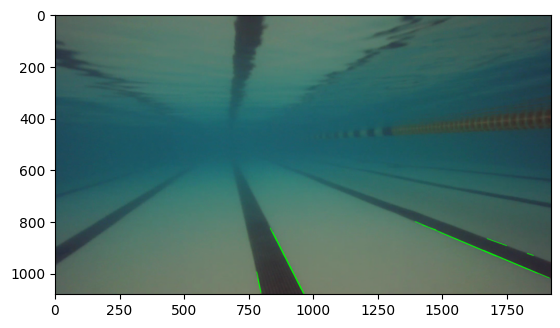

-2.485074626865672
8.18421052631579
8.10204081632653
8.046511627906977
-2.484848484848485
-2.4642857142857144
0.12962962962962962
-2.4942528735632186
7.935483870967742
-2.5
7.5
8.1875


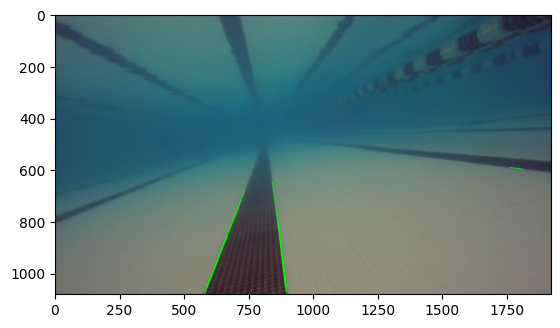

6.363636363636363
6.382352941176471
-1.9803921568627452
-1.9615384615384615
6.333333333333333
-1.967741935483871
0.1415929203539823
-1.9603960396039604
0.1392857142857143
-1.967741935483871
-11.636363636363637
34.0
-3.2444444444444445
-5.057142857142857
9.666666666666666
6.473684210526316
-14.666666666666666
-1.956896551724138
-1.9672131147540983
-2.4782608695652173
-2.746031746031746
-1.9565217391304348
-7.28
9.833333333333334
-22.666666666666668
-4.0344827586206895
-5.0606060606060606
-1.9574468085106382
-2.55
17.6
-1.97
-1.971830985915493
-11.454545454545455
-3.2666666666666666
-2.1463414634146343
-5.136363636363637
-2.525
-10.0
-0.5546218487394958
-3.5
-4.0606060606060606
-7.777777777777778
-57.0
-1.9393939393939394
-1.0
-3.3
6.377777777777778
-2.2
-2.4727272727272727
-2.9393939393939394
0.14285714285714285
-8.0
29.0
-32.0
-2.119047619047619
-3.6315789473684212
-2.823529411764706
10.333333333333334


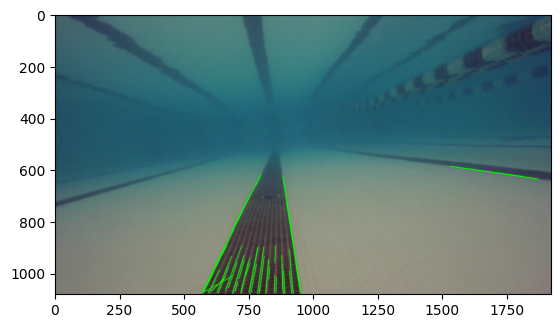

0.23125
0.32456140350877194
0.23024830699774265
0.22865853658536586
0.22879177377892032
0.23013245033112584
0.324582338902148
0.3235294117647059
0.22966507177033493
0.3
5.454545454545454
0.23316062176165803
0.31932773109243695
0.3225806451612903
-0.34146341463414637
-0.3466666666666667
5.5
5.5
-0.6129032258064516
0.32432432432432434
4.181818181818182
-0.36486486486486486
0.2303370786516854
-0.6363636363636364
2.7777777777777777
-0.26666666666666666
-0.34523809523809523
2.888888888888889
-0.1


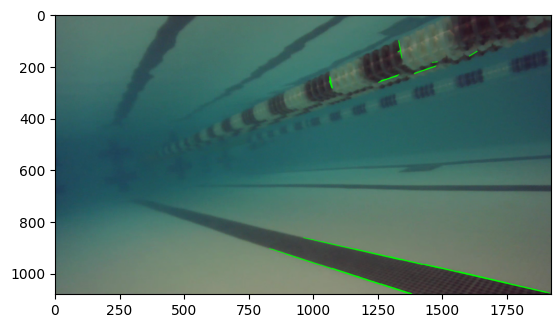

1.04
-0.7545691906005222
0.6992481203007519
1.036319612590799
-0.933649289099526
0.6985074626865672
-0.9330143540669856
-0.9347826086956522
0.6985074626865672
-0.7540983606557377
1.0391061452513966
-0.7538461538461538
-0.9349112426035503
0.6985294117647058
0.9753086419753086
-0.9327354260089686
1.0392156862745099
0.9
-0.7529691211401425
0.7008797653958945
0.6986301369863014
0.9272727272727272
1.0769230769230769
0.6964285714285714
0.9230769230769231
-0.9090909090909091
0.9433962264150944
0.7
0.975
0.9705882352941176
0.9090909090909091
0.9666666666666667
-0.4878048780487805
-1.0294117647058822
-0.7580645161290323
-1.054054054054054
1.1851851851851851
0.9642857142857143
0.9
-1.04
0.9482758620689655


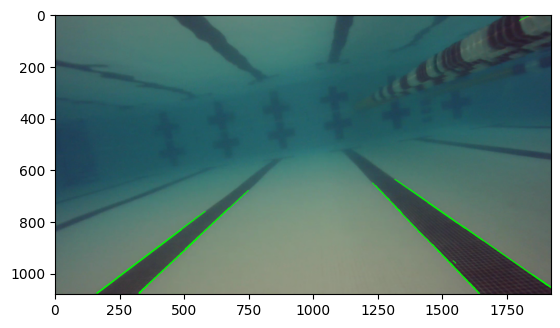

-0.15873015873015872
-0.2318840579710145


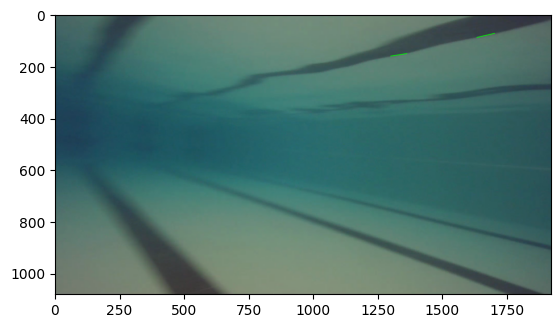

0.1927710843373494
-1.7307692307692308
-4.338709677419355
0.12087912087912088
0.1917808219178082
-1.7777777777777777
-1.7372881355932204
-4.315068493150685
0.19148936170212766
-1.7256637168141593
0.12206572769953052
-1.7333333333333334
-4.2592592592592595
-4.38
-1.7272727272727273
-1.7352941176470589
-1.72
-0.7037037037037037
-4.318181818181818
0.2028985507246377
0.20454545454545456
-0.7142857142857143
-1.6782608695652175
0.1220472440944882


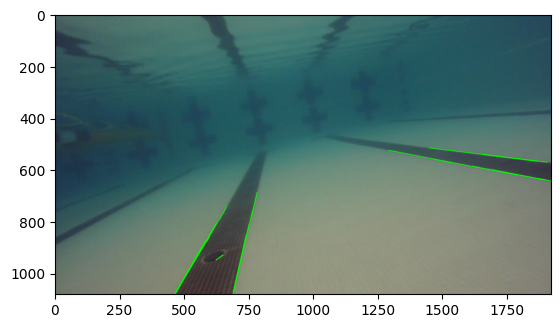

0.12248062015503876
0.12222222222222222
0.23134328358208955
0.12295081967213115
0.125
0.23054755043227665
0.12280701754385964
-0.0893854748603352
0.1235632183908046
0.22822822822822822
0.23142857142857143
0.12166172106824925
0.28205128205128205
-1.3428571428571427
-0.07142857142857142
-0.2132701421800948
0.2109704641350211
0.11961722488038277
0.30612244897959184
0.0975609756097561
0.22857142857142856
-0.2
0.0
0.2076923076923077
0.12236286919831224
-1.8644067796610169
0.21212121212121213
0.5555555555555556
-0.23076923076923078
0.10569105691056911
0.21081081081081082
-0.23076923076923078
-0.26666666666666666
-0.2302158273381295
-0.7878787878787878
0.5185185185185185
0.3113207547169811
0.23076923076923078
-0.22950819672131148
-0.08433734939759036
0.21296296296296297


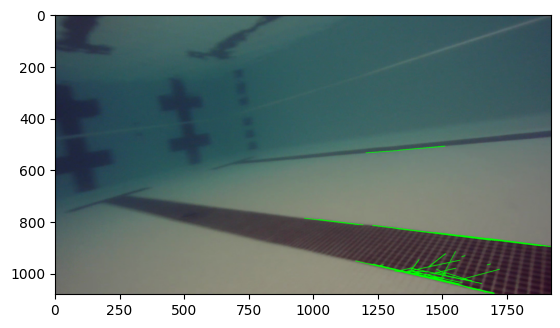

-1.0
-0.2507462686567164
-0.2652439024390244
-1.0
-0.2679738562091503
-1.0
-0.265625
-1.0
-0.26136363636363635
-0.2828282828282828
-1.0285714285714285
-0.23387096774193547
-0.2625
-0.1875
-0.24806201550387597
-0.22959183673469388
-1.0303030303030303
-0.26495726495726496
-0.2523364485981308
-0.28125
-1.0
-1.0
-1.1111111111111112
-0.26576576576576577
-0.23255813953488372
-0.21428571428571427
-0.3064516129032258
-1.2318840579710144
-0.2683982683982684
-1.037037037037037
-0.22826086956521738


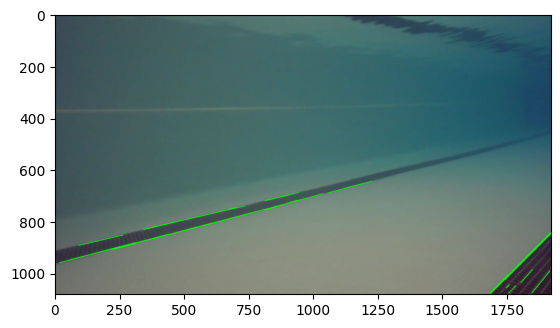

-19.352941176470587
-2.3592814371257487
-2.358288770053476
0.3256484149855908
0.3250883392226148
-19.533333333333335
-2.361290322580645
0.28753993610223644
-18.454545454545453
-2.3548387096774195
0.37755102040816324
-2.361344537815126
0.28484848484848485
0.3333333333333333
-2.3076923076923075
-13.666666666666666
0.32608695652173914
-19.0


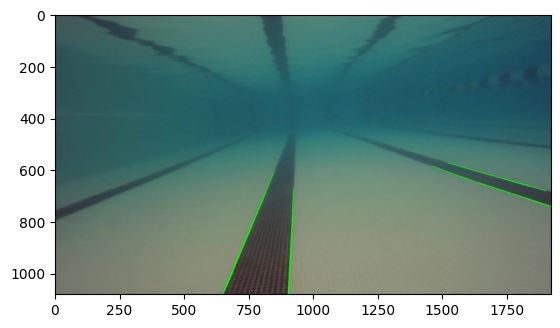

-0.0877742946708464
-0.08904109589041095
-0.08706166868198308
-0.09090909090909091
-0.0863157894736842
-0.07547169811320754
-0.08666666666666667
-0.08743169398907104
-0.08780487804878048
-0.08671586715867159
-0.08866995073891626
-0.09090909090909091
-0.0625
-0.0847457627118644
-0.08333333333333333
-0.09090909090909091
-0.08695652173913043
-0.037037037037037035
-0.11688311688311688
-0.09154929577464789
-0.02702702702702703
-0.08633093525179857
-0.09090909090909091
-0.07058823529411765
-0.06451612903225806
-0.08962264150943396
-0.08771929824561403
-0.07407407407407407
0.08333333333333333
0.1


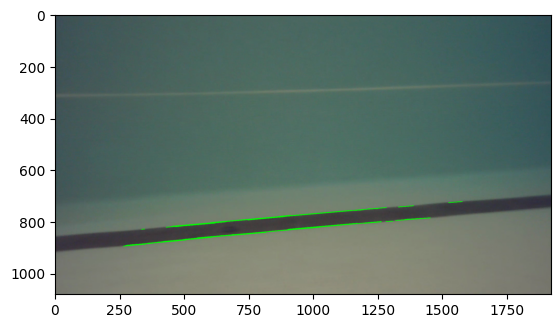

0.2315202231520223
0.23205741626794257
0.23228346456692914
0.1931166347992352
0.19309262166405022
0.1941747572815534
0.19498607242339833
0.23138297872340424
0.2302158273381295
0.2303473491773309
0.1937799043062201
0.232
0.19791666666666666
0.19047619047619047
0.23
0.1937984496124031
0.23684210526315788


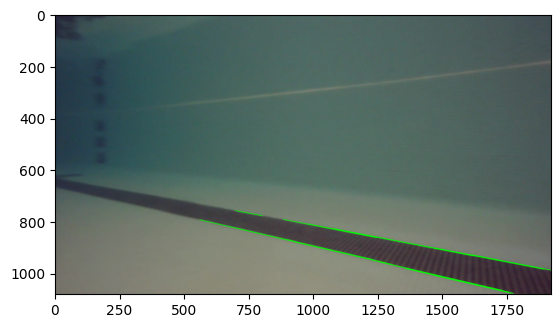

-2.4657534246575343
-1.110032362459547
-1.1114206128133706
-1.108359133126935
0.050335570469798654
-2.486842105263158
-2.4683544303797467
-2.474074074074074
0.0
-1.1093247588424437
-2.4689655172413794
-1.1101321585903083
0.03225806451612903
0.0
-0.24242424242424243
0.02
0.05084745762711865
-1.1166666666666667
-1.1073170731707318
-0.21212121212121213
-0.21052631578947367
-0.24752475247524752
-1.10828025477707
-2.4765625
0.0
-0.23529411764705882
-0.26666666666666666
-0.041666666666666664
0.05357142857142857
-0.24193548387096775


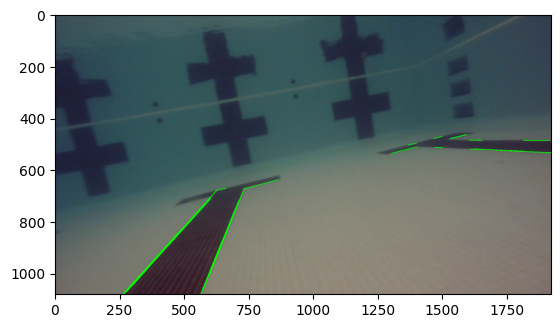

-0.3055295220243674
-0.2691751085383502
-0.3052930056710775
-0.2692307692307692
0.19047619047619047
0.12244897959183673
0.1896551724137931
-0.26811594202898553
-0.30523255813953487
0.12333333333333334
-0.26804123711340205
-0.3950617283950617
0.125
0.19047619047619047
-0.4017094017094017
-0.2706766917293233
0.21666666666666667
-0.23376623376623376
0.2
-0.2676282051282051
0.19205298013245034
-0.2685459940652819
-0.3050314465408805
-0.3054234062797336
-0.3055555555555556
-0.43478260869565216
-0.41379310344827586
-0.3979591836734694
-0.2413793103448276
-0.30597014925373134
-0.26621160409556316
-0.4090909090909091
-0.5384615384615384
-0.4230769230769231


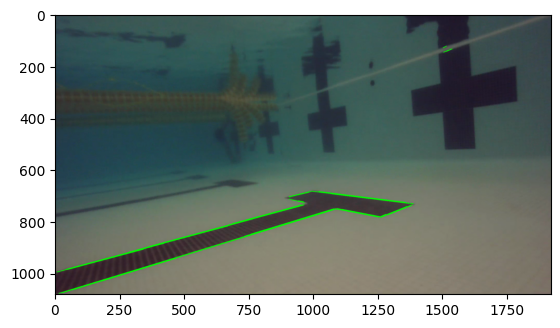

9.733333333333333
11.486486486486486
14.233333333333333
13.714285714285714
11.185185185185185
-0.17452830188679244
14.12
11.2
9.5
-0.1774193548387097
-0.17509727626459143
-0.26666666666666666
-0.16923076923076924
9.56
14.0
9.67741935483871
-0.5333333333333333
18.4
-9.0
13.733333333333333
-0.17616580310880828
-0.2892561983471074
-0.14754098360655737
9.666666666666666
-0.15384615384615385
-0.3037974683544304
-0.1773049645390071


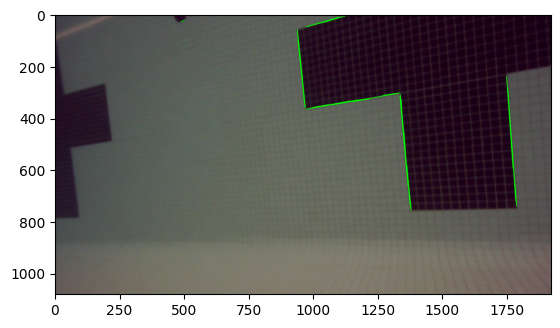

In [6]:
video = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = video.read()
count = 0
frequency = 150
while ret:

    if count % frequency == 0:
        plt.imshow(cv2.cvtColor(drawLines(frame), cv2.COLOR_BGR2RGB))
        plt.show()
        
    count+=1
    ret, frame = video.read()


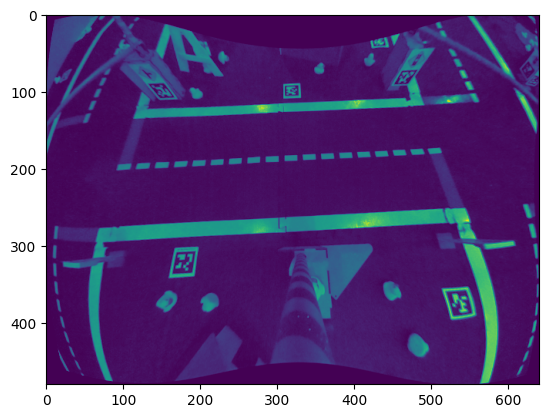

In [7]:
from dt_apriltags import Detector
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

at_detector = Detector(families='tag36h11', #controls what it is supposed to detect
                       nthreads=1, #controls the number of threads used in the detection
                       quad_decimate=1.0, #controls to what scale the image is lowered in resolution
                       quad_sigma=0.0, #blur applied to the image to reduce noise
                       refine_edges=1, #attempts to redefine the edges of the tag boundaries
                       decode_sharpening=0.25, #controls how much the image is sharpened after the tags are discovered
                       debug=0) # no debugging information will be produced

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(img)